## Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# load data into data frames
funnel = pd.read_csv("funnel.csv")
loans = pd.read_csv("loans.csv")
merchants = pd.read_csv("merchants.csv")

In [4]:
# data cleaning 

# convert series to the correct data types
funnel.action_date = pd.to_datetime(funnel.action_date)
loans.checkout_date = pd.to_datetime(loans.checkout_date)
loans.users_first_capture = pd.to_datetime(loans.users_first_capture.replace('0',np.NaN))

# assign missing value where applicable
funnel.user_id.replace('0',np.NaN,inplace=True)

# There is no unexpected null value -- this is good
# print funnel.isnull().sum()
# print loans.isnull().sum()
# print merchants.isnull().sum()

In [5]:
funnel.head()

,merchant_id,user_id,checkout_id,action,action_date
0,D59QS30LK6F2IYOA,2291-6569-ZLWO,MP7KTW20X4LVWDQB,Checkout Loaded,2016-03-31
1,3XGCFF8YUFM65WSM,4927-7293-MJWN,UTYSI56OMVL9JW0C,Checkout Loaded,2016-01-29
2,H7GADDVO9CIZHMCL,NaN,2QV1BSCTSMBL6M0M,Checkout Loaded,2016-03-05
3,MNLK8D11U6PV4THN,NaN,ZM2PFHD1UUQBZHAC,Checkout Loaded,2016-03-27
4,H7GADDVO9CIZHMCL,NaN,CLPU7LY5JMOZQ7LU,Checkout Loaded,2016-03-09


In [6]:
loans.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2016-02-06,1060.0,0.0,2015-10-13,1972,12,0.025,0.25,685,0.0055
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2016-02-01,2300.0,0.0,NaT,1981,12,0.019,0.30,628,0.0353
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,2016-03-31,850.0,0.0,NaT,1983,6,0.059,0.00,808,0.0584
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,2016-03-28,950.0,0.0,NaT,1981,6,0.059,0.00,612,0.0759
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,2016-01-05,859.0,0.0,NaT,1951,6,0.059,0.00,783,0.1019


In [7]:
merchants.head()

,merchant_id,merchant_name,category
0,D59QS30LK6F2IYOA,Mozzarella Factory,Furniture
1,2ZOAIY64Q3G5QU6Q,American Inc.,Jewelry
2,XG9744A6PCIJXTVB,Monterey Jack Sparrow,Furniture
3,P2T82BO89LRD4WYH,Brie Corp.,Music
4,I19WHSQA1OEG7OLK,Halloumi Boards,Jewelry


## Q1: Data exploration and abnormality check

Check for duplicates

In [8]:
# funnel has one record per checkout_id & action -- this is good
# print funnel[funnel.duplicated(subset = ['checkout_id','action'],keep=False)].sort_values(by = 'checkout_id')

# loans has unique record per checkout_id -- this is good
# print loans[loans.duplicated(subset = ['checkout_id'],keep=False)].sort_values(by = 'checkout_id')

# merchant_id is unique -- this is good
# print merchants[merchants.duplicated(subset = ['merchant_id'],keep=False)].sort_values(by = 'merchant_id')

# merchant_name 'Roquefort NYC' is duplicated and has two merchant_id's, could be data issue
# only one of the merchant_id's has loan data, but both has funnel data
# for this analysis, the duplicated merchant is renamed as 'Roquefort NYC 2'
print 'duplicated merchant ', merchants[merchants.duplicated(subset = ['merchant_name'],keep=False)].sort_values(by = 'merchant_name')
#print loans[loans.merchant_id.isin(['5JDXXV6949VE1GLT','H7GADDVO9CIZHMCL'])].merchant_id.value_counts()
#print funnel[funnel.merchant_id.isin(['5JDXXV6949VE1GLT','H7GADDVO9CIZHMCL'])].merchant_id.value_counts()
#print funnel[funnel.merchant_id.isin(['5JDXXV6949VE1GLT'])]
merchants.set_index('merchant_id',inplace=True)
merchants.at['5JDXXV6949VE1GLT','merchant_name'] = 'Roquefort NYC 2'
merchants.reset_index(inplace=True)

duplicated merchant          merchant_id  merchant_name category
5  5JDXXV6949VE1GLT  Roquefort NYC    Music
7  H7GADDVO9CIZHMCL  Roquefort NYC    Music


Potential data issue in loans table

In [9]:
# potential data issue in loans table: DoB invalid year, fico score = 0, loan amount too small
loans.describe()

,loan_amount,down_payment_amount,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage
count,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000
mean,760.813632,25.073145,1975.162543,8.758029,0.032777,0.195146,649.448326,0.060408
std,924.629640,184.794586,11.614734,3.662579,0.023479,0.123484,95.882933,0.177156
min,0.230000,0.000000,1899.000000,1.000000,0.000000,0.000000,0.000000,-0.999800
25%,210.000000,0.000000,1968.000000,6.000000,0.019000,0.000000,614.000000,0.039800
50%,513.000000,0.000000,1976.000000,12.000000,0.019000,0.250000,648.000000,0.093600
75%,950.000000,0.000000,1984.000000,12.000000,0.059000,0.300000,691.000000,0.147200
max,34020.000000,16520.000000,1997.000000,18.000000,0.200000,0.300000,850.000000,0.200000


Look into the above data issues in the loans table

In [10]:
# there are users over 100 years old. May need to double-check to make sure they are legit 
# loans[loans.user_dob_year < 1918][['user_id','user_dob_year']]

# no user < 18 years old -- this is good
# loans[loans.user_dob_year > 2000][['user_id','user_dob_year']]

# Some loans have invalid fico score values. 
# Need to investigate: Is this data issue or some other risk score was used for these loans? 
# sum(loans.fico_score < 300)

# there are many loans with very small loan amounts (as low as $0.23). 
# Need to double-check what is the minimum loan amount allowed.
# loans[loans.loan_amount < 100].loan_amount.hist(bins=20)
# loans[loans.loan_amount < 50].loan_amount.value_counts().sort_index()

# down payment should be less than loan amount
# loans[loans.down_payment_amount >= loans.loan_amount][['checkout_id','down_payment_amount','loan_amount']]

# loan length values are all expected -- this is good
# loans.loan_length_months.value_counts()


Potential data issue in the funnel table

In [11]:
# missing action steps 
print '"Checkout Completed" without "Loan Terms Approved": ', sum(~funnel[funnel.action == "Checkout Completed"].checkout_id.isin(funnel[funnel.action == "Loan Terms Approved"].checkout_id.values))
print '"Loan Terms Approved" without "Loan Terms Run": ', sum(~funnel[funnel.action == "Loan Terms Approved"].checkout_id.isin(funnel[funnel.action == "Loan Terms Run"].checkout_id.values))
print '"Loan Terms Run" without "Checkout Loaded": ', sum(~funnel[funnel.action == "Loan Terms Run"].checkout_id.isin(funnel[funnel.action == "Checkout Loaded"].checkout_id.values))

# print out the 5 checkout_id's that have"Checkout Completed" but no "Loan Terms Approved"
# funnel[funnel.action == "Checkout Completed"][~funnel[funnel.action == "Checkout Completed"].checkout_id.isin(funnel[funnel.action == "Loan Terms Approved"].checkout_id.values)]
# funnel[funnel.checkout_id.isin(['5XN9JR0P715U3ZCF','98JDZ4GZLLX1SRLN','HCYQNCB90S76YJIP','TTPWITH6OUYPGRX7','M8E2A4YS6NTEFMWF'])].sort_values(by=['checkout_id','action_date'])

"Checkout Completed" without "Loan Terms Approved":  5
"Loan Terms Approved" without "Loan Terms Run":  0
"Loan Terms Run" without "Checkout Loaded":  814


Fill in missing action steps in the funnel table

In [12]:
# fill missing step3 using step4
missing_step3 = funnel[funnel.action == "Checkout Completed"][~funnel[funnel.action == "Checkout Completed"].checkout_id.isin(
    funnel[funnel.action == "Loan Terms Approved"].checkout_id.values)]
missing_step3["action"] = "Loan Terms Approved"
missing_step3["imputed"] = 1
filled_step3 = pd.concat([funnel,missing_step3])

# fill missing step2 using step3
missing_step2 = filled_step3[filled_step3.action == "Loan Terms Approved"][~filled_step3[filled_step3.action == "Loan Terms Approved"].checkout_id.isin(
    filled_step3[filled_step3.action == "Loan Terms Run"].checkout_id.values)]
missing_step2["action"] = "Loan Terms Run"
missing_step2["imputed"] = 1
filled_step2 = pd.concat([filled_step3,missing_step2])

# fill missing step1 using step2
missing_step1 = filled_step2[filled_step2.action == "Loan Terms Run"][~filled_step2[filled_step2.action == "Loan Terms Run"].checkout_id.isin(
    filled_step2[filled_step2.action == "Checkout Loaded"].checkout_id.values)]
missing_step1["action"] = "Checkout Loaded"
missing_step1["imputed"] = 1
filled_step1 = pd.concat([filled_step2,missing_step1])

In [13]:
# check if anything still missing after filling -- no missing, this is good
print '"Checkout Completed" without "Loan Terms Approved": ', sum(~filled_step1[filled_step1.action == "Checkout Completed"].checkout_id.isin(filled_step1[filled_step1.action == "Loan Terms Approved"].checkout_id.values))
print '"Loan Terms Approved" without "Loan Terms Run": ', sum(~filled_step1[filled_step1.action == "Loan Terms Approved"].checkout_id.isin(filled_step1[filled_step1.action == "Loan Terms Run"].checkout_id.values))
print '"Loan Terms Run" without "Checkout Loaded": ', sum(~filled_step1[filled_step1.action == "Loan Terms Run"].checkout_id.isin(filled_step1[filled_step1.action == "Checkout Loaded"].checkout_id.values))

"Checkout Completed" without "Loan Terms Approved":  0
"Loan Terms Approved" without "Loan Terms Run":  0
"Loan Terms Run" without "Checkout Loaded":  0


In [14]:
# replace the funnel table with newly filled funnel table
funnel = filled_step1

Check discrepancies among tables

In [15]:
# there are >3000 loans not found in funnel table -- data issue should be investigated
print 'Number of loans not found in funnel "Checkout Completed": ', sum(~loans.checkout_id.isin(funnel[funnel.action == "Checkout Completed"].checkout_id.values))

# all "checkout completed" are accounted for in the loans table -- this is good
print 'Number of funnel "Checkout Completed" records not found in loans: ', sum(~funnel[funnel.action == "Checkout Completed"].checkout_id.isin(loans.checkout_id.values))

Number of loans not found in funnel "Checkout Completed":  3016
Number of funnel "Checkout Completed" records not found in loans:  0


Merge the tables together to prepare for further analysis

In [16]:
# Merge the 3 tables together: exclude those loans not found in funnel table
loan_in_funnel = loans[loans.checkout_id.isin(funnel[funnel.action == "Checkout Completed"].checkout_id.values)]
funnel_merchants = funnel.merge(merchants, how = 'left', on = 'merchant_id')
funnel_loans = funnel_merchants.merge(loan_in_funnel, how = 'left', on = 'checkout_id')
funnel_loans.head()

,action,action_date,checkout_id,imputed,merchant_id_x,user_id_x,merchant_name,category,merchant_id_y,user_id_y,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage
0,Checkout Loaded,2016-03-31,MP7KTW20X4LVWDQB,NaN,D59QS30LK6F2IYOA,2291-6569-ZLWO,Mozzarella Factory,Furniture,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Checkout Loaded,2016-01-29,UTYSI56OMVL9JW0C,NaN,3XGCFF8YUFM65WSM,4927-7293-MJWN,Bagels & Cream,Apparel,3XGCFF8YUFM65WSM,4927-7293-MJWN,2016-01-29,166.7,0.0,2016-01-18,1975.0,12.0,0.019,0.3,653.0,0.0035
2,Checkout Loaded,2016-03-05,2QV1BSCTSMBL6M0M,NaN,H7GADDVO9CIZHMCL,NaN,Roquefort NYC,Music,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,Checkout Loaded,2016-03-27,ZM2PFHD1UUQBZHAC,NaN,MNLK8D11U6PV4THN,NaN,Pepperjack Co.,Furniture,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,Checkout Loaded,2016-03-09,CLPU7LY5JMOZQ7LU,NaN,H7GADDVO9CIZHMCL,NaN,Roquefort NYC,Music,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# check inter-column data relationships

# the user_id and merchant_id from funnel and loans table are consistent -- this is good
# sum(funnel_loans.merchant_id_y.notnull() & (funnel_loans.merchant_id_x != funnel_loans.merchant_id_y))
# sum(funnel_loans.user_id_y.notnull() & (funnel_loans.user_id_x != funnel_loans.user_id_y))

# On rare occasions, there's a gap between action_date and checkout_date
# i.e. actions for the same checkout can span multiple days. 
print 'gap between action_date and checkout_date: '
print (funnel_loans.checkout_date - funnel_loans.action_date).value_counts()


gap between action_date and checkout_date: 
0 days    162333
1 days       346
2 days         4
4 days         1
dtype: int64


## Q2: Calculate conversion through the funnel by day 

In [18]:
# create conversion table 
conversion = funnel_loans.groupby(['action_date','action'], axis=0).size().unstack()
conversion.columns = ['num_confirmed', 'num_loaded', 'num_approved', 'num_applied']
conversion = conversion[['num_loaded','num_applied','num_approved','num_confirmed']]
conversion['application_rate'] = conversion['num_applied'] / conversion['num_loaded']
conversion['approval_rate'] = conversion['num_approved'] / conversion['num_applied'] 
conversion['confirmation_rate'] = conversion['num_confirmed'] / conversion['num_approved'] 
conversion.head()

,num_loaded,num_applied,num_approved,num_confirmed,application_rate,approval_rate,confirmation_rate
action_date,,,,,,,
2016-01-01,1482,1072,665,397,0.723347,0.620336,0.596992
2016-01-02,1826,1349,795,485,0.738773,0.589325,0.610063
2016-01-03,1836,1339,810,488,0.729303,0.604929,0.602469
2016-01-04,2050,1508,913,554,0.735610,0.605438,0.606791
2016-01-05,2317,1585,899,577,0.684074,0.567192,0.641824


One caveat of this table: 
- It seems that this is intended to be a summary of daily funnel performance. This table would make the most sense if, for the same checkout, all 4 actions happen on the same day. However, the data show that sometimes actions can span multiple days. i.e. A confirmed loan might have been loaded days before. This complicates the explanation of daily conversion rates (last 3 columns). 
- But since the multi-day situation is rare (< 1%), for the purpose of this analysis, date is strictly based on action_date and no special handling has been done to assign all actions to the same date. 
- Missing steps in funnel table (identified in Question 1) were filled in before calculating conversion.

## Q3: Which merchant industry and/or user demographic to focus business development on?

Metrics:
    1. Total revenue, where revenue = (mdr + loan_return_percentage) * loan_amount
    2. Revenue per loan (ROI) 
    3. Conversion rates
    4. % of return users

Compare revenue across merchant industries and user age groups

In [37]:
# data prep
funnel_loans['age'] = 2018 - funnel_loans.user_dob_year + 1
funnel_loans['age_grp'] = pd.cut(funnel_loans.age, bins = [0,25,30,35,40,45,50,55,60,65,np.inf])
funnel_loans.ix[funnel_loans.action == 'Checkout Completed','revenue'] = (funnel_loans.mdr + funnel_loans.loan_return_percentage) * funnel_loans.loan_amount
funnel_loans['fico_grp'] = pd.cut(funnel_loans.fico_score, bins = [0,600,650,700,750,800,np.inf])

In [20]:
# compute total revenue by industry by user age group
revenue_by_cat_by_age = funnel_loans[funnel_loans.action == 'Checkout Completed'].groupby(['age_grp','category'], axis=0).revenue.sum().unstack()

# compute total number of loans by industry by user age group
app_by_cat_by_age = funnel_loans[funnel_loans.action == 'Loan Terms Run'].groupby(['age_grp','category'], axis=0).size().unstack()

# compute average revenue per loan by industry by user age group -- similar to ROI
avg_revenue_by_cat_by_age = revenue_by_cat_by_age / app_by_cat_by_age

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

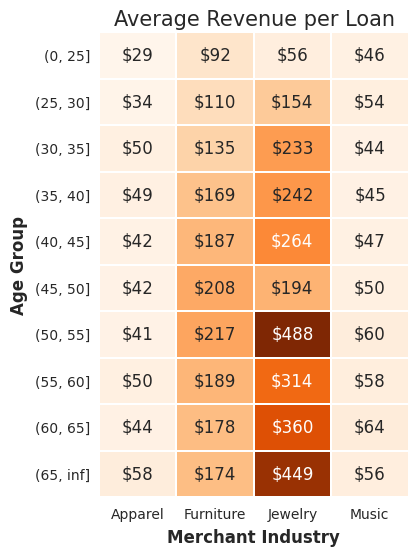

In [21]:
# visualize the above data
sns.set()

f, ax = plt.subplots(figsize=(4,6))
revenue_map = sns.heatmap(avg_revenue_by_cat_by_age, cmap='Oranges', annot=True, cbar=False,fmt=".0f", linewidths=.5, ax=ax)
for t in revenue_map.texts: t.set_text("$"+t.get_text())
plt.title('Average Revenue per Loan', fontsize='15')
plt.ylabel('Age Group', fontweight='bold',fontsize='12')
plt.xlabel('Merchant Industry',fontweight='bold',fontsize='12')
plt.yticks(fontsize='10')
plt.xticks(fontsize='10')

In [22]:
avg_revenue_by_cat_by_age

category,Apparel,Furniture,Jewelry,Music
age_grp,,,,
"(0, 25]",29.184616,91.753076,55.818130,46.210404
"(25, 30]",34.238230,109.899143,154.218147,53.525840
"(30, 35]",49.657035,135.318917,232.518388,44.489234
"(35, 40]",48.633291,168.805083,242.083285,44.969331
"(40, 45]",41.867495,186.550236,264.325154,46.696354
"(45, 50]",41.684526,208.290691,193.723211,50.488673
"(50, 55]",40.505727,217.079132,487.633767,59.721568
"(55, 60]",49.929662,188.523247,314.214052,57.577747
"(60, 65]",43.516662,177.705917,359.623275,63.532626


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

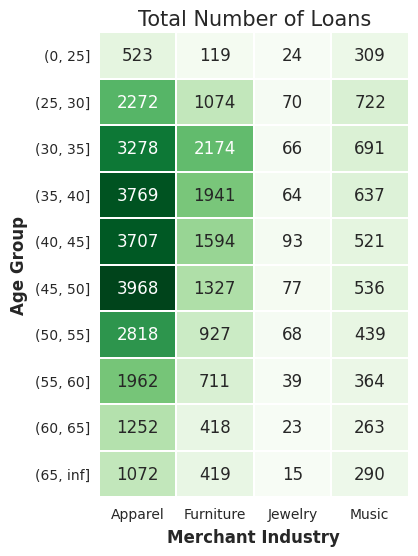

In [23]:
f, ax = plt.subplots(figsize=(4,6))
sns.heatmap(app_by_cat_by_age, cmap='Greens', annot=True, cbar=False, fmt=".0f", linewidths=.5, ax=ax)
plt.title('Total Number of Loans', fontsize='15')
plt.ylabel('Age Group', fontweight='bold',fontsize='12')
plt.xlabel('Merchant Industry',fontweight='bold',fontsize='12')
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

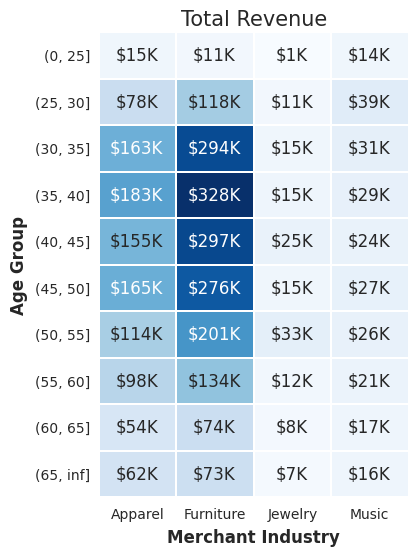

In [24]:
revenue_by_cat_by_age_k = revenue_by_cat_by_age / 1000
f, ax = plt.subplots(figsize=(4,6))
tot_revenue_map = sns.heatmap(revenue_by_cat_by_age_k, cmap='Blues', annot=True, cbar=False, fmt=".0f", linewidths=.5, ax=ax)
for t in tot_revenue_map.texts: t.set_text("$"+t.get_text()+"K")
plt.title('Total Revenue', fontsize='15')
plt.ylabel('Age Group', fontweight='bold',fontsize='12')
plt.xlabel('Merchant Industry',fontweight='bold',fontsize='12')
plt.xticks(fontsize='10')
plt.yticks(fontsize='10')

In [25]:
# recommendation: 
# Furniture: 30-50
# Jewelry: total rev too small due to small number of loan applications due to small market.
# Apparel: total rev large, but cost also large due to too many loan applications.

In [26]:
# data prep, continued

# Number of return users by industry by age group
# Use all loans data, including those records not found in funnel data
loan_merchant = loans.merge(merchants, how = 'left', on = 'merchant_id')
loan_merchant['age'] = 2018 - loan_merchant.user_dob_year + 1
loan_merchant['age_grp'] = pd.cut(loan_merchant.age, bins = [0,25,30,35,40,45,50,55,60,65,np.inf])

In [27]:
# Number of return users by category
return_users = pd.DataFrame({'user_id' : loan_merchant.query('users_first_capture.notnull()').user_id.unique()})
return_users_by_cat = loan_merchant.merge(return_users, how = 'right', on = 'user_id').groupby(['category']).user_id.unique().apply(len)
print 'return user count breakdown'
return_users_by_cat


return user count breakdown


category
Apparel      9083
Furniture     737
Jewelry        78
Music        1119
Name: user_id, dtype: int64

In [28]:
# Number of all users by industry 
all_users_by_cat = loan_merchant.groupby(by=['category']).user_id.unique().apply(len)
#all_users_by_cat = loan_merchant.groupby(by=['category','age_grp']).user_id.unique().apply(len)
print 'all user count breakdown'
all_users_by_cat

all user count breakdown


category
Apparel      16121
Furniture    11126
Jewelry        536
Music         3831
Name: user_id, dtype: int64

In [29]:
# Percentage of return users by industry
pct_ret_users_by_cat = return_users_by_cat / all_users_by_cat
print '% of return users'
(pct_ret_users_by_cat * 100).apply(round, args=[1])

% of return users


category
Apparel      56.3
Furniture     6.6
Jewelry      14.6
Music        29.2
Name: user_id, dtype: float64

In [30]:
# funnel performance breakdown by industry
conversion_by_cat = funnel_loans.groupby(['category','action'], axis=0).size().unstack()
conversion_by_cat.columns = ['num_confirmed', 'num_loaded', 'num_approved', 'num_applied']
conversion_by_cat = conversion_by_cat[['num_loaded','num_applied','num_approved','num_confirmed']]
conversion_by_cat['application_rate'] = conversion_by_cat['num_applied'] / conversion_by_cat['num_loaded']
conversion_by_cat['approval_rate'] = conversion_by_cat['num_approved'] / conversion_by_cat['num_applied'] 
conversion_by_cat['confirmation_rate'] = conversion_by_cat['num_confirmed'] / conversion_by_cat['num_approved'] 
conversion_by_cat

# Apparel and Furniture have good funnel conversion rates and should be the focus
# the problem with Jewelry industry is that both approval and confirmation rates are low
# the problem with music industry is mainly in the approval rate

,num_loaded,num_applied,num_approved,num_confirmed,application_rate,approval_rate,confirmation_rate
category,,,,,,,
Apparel,97716,71718,37752,24621,0.733943,0.526395,0.652177
Furniture,37416,25872,15201,10704,0.691469,0.587546,0.704164
Jewelry,7625,4629,1725,539,0.607082,0.372651,0.312464
Music,55761,28994,8591,4772,0.519969,0.296303,0.555465


Current overall performance metrics for Exec Summary slide:

In [31]:
# overall funnel performance
conversion_all = funnel_loans.groupby(['action'], axis=0).size()
print 'Overall application rate: ', round(float(conversion_all[3])/conversion_all[1], 3)
print 'Overall approval rate: ', round(float(conversion_all[2])/conversion_all[3], 3)
print 'Overall confirmation rate: ', round(float(conversion_all[0])/conversion_all[2], 3)


Overall application rate:  0.661
Overall approval rate:  0.482
Overall confirmation rate:  0.642


In [32]:
# overall revenue
print 'Total Revenue for Q1 2016: ', funnel_loans[funnel_loans.action == 'Checkout Completed'].revenue.sum()
print 'Average Revenue per Loan for Q1 2016: ', funnel_loans[funnel_loans.action == 'Checkout Completed'].revenue.mean()


Total Revenue for Q1 2016:  3286897.02317
Average Revenue per Loan for Q1 2016:  80.8167250171


In [33]:
# overall number of users
print 'Total number of users in Q1 2016: ', loan_merchant.user_id.unique().shape[0]
print 'Number of return users in Q1 2016: ', return_users.shape[0]
print '% of return users in Q1 2016: ', float(return_users.shape[0])/loan_merchant.user_id.unique().shape[0] * 100

Total number of users in Q1 2016:  31587
Number of return users in Q1 2016:  10956
% of return users in Q1 2016:  34.6851552854


In [38]:
# loan number by fico band
funnel_loans[funnel_loans.action == 'Checkout Completed'].groupby(['fico_grp','category']).revenue.size().unstack()


category,Apparel,Furniture,Jewelry,Music
fico_grp,,,,
"(0, 600]",4508,1082,8,642
"(600, 650]",9656,2746,125,1765
"(650, 700]",6481,2674,194,1450
"(700, 750]",2462,2047,123,503
"(750, 800]",930,1388,67,209
"(800, inf]",305,624,21,84


In [ ]:
# average revenue by fico band
funnel_loans[funnel_loans.action == 'Checkout Completed'].groupby(['fico_grp','category']).revenue.mean().unstack()

In [36]:
funnel_loans.columns


Index([u'action', u'action_date', u'checkout_id', u'imputed', u'merchant_id_x',
       u'user_id_x', u'merchant_name', u'category', u'merchant_id_y',
       u'user_id_y', u'checkout_date', u'loan_amount', u'down_payment_amount',
       u'users_first_capture', u'user_dob_year', u'loan_length_months', u'mdr',
       u'apr', u'fico_score', u'loan_return_percentage', u'age', u'age_grp',
       u'revenue'],
      dtype='object')